In [1]:
import numpy as np
import pandas as pd

# please make sure the file preprocessing.py is in place
import preprocessing as pp

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
data = pd.read_csv('modified_dataset.csv')
data_copy = data
data_copy.head()

,text,labels,id
0,My favourite food is anything I didn't have to...,13,eebbqej
1,"Now if he does off himself, everyone will thin...",13,ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj
3,To make her feel threatened,7,ed7ypvh
4,Dirty Southern Wankers,3,ed0bdzj


## Data Preprocessing



### Variation #1

Using **unigrams** , **lemmatization**, and removal of **additional** stopwords.

In [3]:
# remove punctuations
data['var1'] = data['text'].apply(pp.remove_punctuations)

# unigram (or simply tokenization)
data['var1'] = data['var1'].apply(lambda x: pp.n_grams(x, n=1))

# lemmatize
data['var1'] = data['var1'].apply(pp.lem)

# remove stopwords
# define extra stopwords
stops = ['name', 'religion']
data['var1'] = data['var1'].apply(lambda x: pp.remove_stopwords(x, sw=stops))

### Variation #2

Using **unigrams**, **stemming**, and removal of **additional** stopwords.

In [4]:
# remove punctuations
data['var2'] = data['text'].apply(pp.remove_punctuations)

# unigram (or simply tokenization)
data['var2'] = data['var2'].apply(lambda x: pp.n_grams(x, n=1))

# stemming
data['var2'] = data['var2'].apply(pp.stem)

# remove stopwords
data['var2'] = data['var2'].apply(lambda x: pp.remove_stopwords(x, sw=stops))

### Variation #3

Using **unigrams**, **stemming**, **lemmatization**, and removal of **additional** stopwords.

In [5]:
# remove punctuations
data['var3'] = data['text'].apply(pp.remove_punctuations)

# unigram (or simply tokenization)
data['var3'] = data['var3'].apply(lambda x: pp.n_grams(x, n=1))

# stemming
data['var3'] = data['var3'].apply(pp.stem)

# lemmatization
data['var3'] = data['var3'].apply(pp.lem)

### Variation #4

Using **unigrams**, **stemming**, **lemmatization**, and removal of stopwords.

In [6]:
# remove punctuations
data['var4'] = data['text'].apply(pp.remove_punctuations)

# bigrams
data['var4'] = data['var4'].apply(lambda x: pp.n_grams(x, n=1))

# stemming
data['var4'] = data['var4'].apply(pp.stem)

# lemmatization
data['var4'] = data['var4'].apply(pp.lem)

# remove stopwords
data['var4'] = data['var4'].apply(lambda x: pp.remove_stopwords(x))

## Text vectorization

Using **Word2Vec**

In [7]:
import vectorization as vz

In [8]:
# transform for the first variation
X1 = vz.Word2Vec(data['var1'])

# transform for the second variation
X2 = vz.Word2Vec(data['var2'])

# transform for the third variation
X3 = vz.Word2Vec(data['var3'])

# transform for the fourth variation
X4 = vz.Word2Vec(data['var4'])

## Split to train/test datasets

Using ``train_test_split`` from the ``sklearn.model_selection`` library. Setting ``random_state`` parameter to **14**, and ``test_size`` to **0.25**.

In [9]:
from sklearn.model_selection import train_test_split

# Split for Variation 1
X1_train, X1_test, y_train, y_test = train_test_split(X1, data['labels'].values, random_state=14, test_size=0.25)

# Split for variation 2
X2_train, X2_test, y_train, y_test = train_test_split(X2, data['labels'].values, random_state=14, test_size=0.25)

# Split for variation 3
X3_train, X3_test, y_train, y_test = train_test_split(X3, data['labels'].values, random_state=14, test_size=0.25)

# Split for variation 4
X4_train, X4_test, y_train, y_test = train_test_split(X4, data['labels'].values, random_state=14, test_size=0.25)

## Train the model 

Using **Bidirectional LSTM**
- Optimizer = Adam
- LSTM layer with 256 neurons with dropout of 0.7 

For **Variation #1**

In [10]:
X1_train = X1_train.reshape((X1_train.shape[0], 1, X1_train.shape[1]))
X1_test = X1_test.reshape((X1_test.shape[0], 1, X1_test.shape[1]))

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout

print("Variation #1 Using unigrams , lemmatization, and removal of additional stopwords.")

m1 = Sequential()

m1.add(Bidirectional(LSTM(256)))
m1.add(Dropout(0.7))
m1.add(Dense(14, activation='softmax'))
m1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

m1.fit(X1_train, y_train, batch_size=32, epochs=20, validation_split=0.25)

Variation #1 Using unigrams , lemmatization, and removal of additional stopwords.
Epoch 1/20
954/954 [==============================] - 105s 66ms/step - loss: 1.9884 - accuracy: 0.3865 - val_loss: 1.7947 - val_accuracy: 0.4323
Epoch 2/20
954/954 [==============================] - 58s 60ms/step - loss: 1.7957 - accuracy: 0.4426 - val_loss: 1.7454 - val_accuracy: 0.4594
Epoch 3/20
954/954 [==============================] - 60s 63ms/step - loss: 1.7505 - accuracy: 0.4508 - val_loss: 1.7190 - val_accuracy: 0.4647
Epoch 4/20
954/954 [==============================] - 69s 72ms/step - loss: 1.7168 - accuracy: 0.4620 - val_loss: 1.7021 - val_accuracy: 0.4694
Epoch 5/20
954/954 [==============================] - 72s 76ms/step - loss: 1.6943 - accuracy: 0.4696 - val_loss: 1.6837 - val_accuracy: 0.4732
Epoch 6/20
954/954 [==============================] - 69s 73ms/step - loss: 1.6765 - accuracy: 0.4728 - val_loss: 1.6820 - val_accuracy: 0.4740
Epoch 7/20
954/954 [==============================] -

For **Variation #2**

In [12]:
X2_train = X2_train.reshape((X2_train.shape[0], 1, X2_train.shape[1]))
X2_test = X2_test.reshape((X2_test.shape[0], 1, X2_test.shape[1]))

In [13]:

print("Variation #2 Using unigrams, stemming, and removal of additional stopwords.")
m2 = Sequential()

m2.add(Bidirectional(LSTM(256)))
m2.add(Dropout(0.7))
m2.add(Dense(14, activation='softmax'))
m2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

m2.fit(X2_train, y_train, batch_size=32, epochs=20, validation_split=0.25)

Variation #2 Using unigrams, stemming, and removal of additional stopwords.
Epoch 1/20
954/954 [==============================] - 57s 55ms/step - loss: 2.0748 - accuracy: 0.3692 - val_loss: 1.9189 - val_accuracy: 0.4095
Epoch 2/20
954/954 [==============================] - 60s 62ms/step - loss: 1.9115 - accuracy: 0.4114 - val_loss: 1.8813 - val_accuracy: 0.4304
Epoch 3/20
954/954 [==============================] - 39s 41ms/step - loss: 1.8685 - accuracy: 0.4241 - val_loss: 1.8514 - val_accuracy: 0.4322
Epoch 4/20
954/954 [==============================] - 50s 53ms/step - loss: 1.8424 - accuracy: 0.4322 - val_loss: 1.8414 - val_accuracy: 0.4388
Epoch 5/20
954/954 [==============================] - 44s 46ms/step - loss: 1.8246 - accuracy: 0.4366 - val_loss: 1.8347 - val_accuracy: 0.4398
Epoch 6/20
954/954 [==============================] - 42s 44ms/step - loss: 1.8061 - accuracy: 0.4396 - val_loss: 1.8247 - val_accuracy: 0.4416
Epoch 7/20
954/954 [==============================] - 41s 43

For **Variation #3**

In [14]:
X3_train = X3_train.reshape((X3_train.shape[0], 1, X3_train.shape[1]))
X3_test = X3_test.reshape((X3_test.shape[0], 1, X3_test.shape[1]))

In [15]:
print("Variation #3 Using unigrams, stemming, lemmatization, and removal of additional stopwords.")
m3 = Sequential()

m3.add(Bidirectional(LSTM(256)))
m3.add(Dropout(0.7))
m3.add(Dense(14, activation='softmax'))
m3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

m3.fit(X3_train, y_train, batch_size=32, epochs=20, validation_split=0.25)

Variation #3 Using unigrams, stemming, lemmatization, and removal of additional stopwords.
Epoch 1/20
954/954 [==============================] - 67s 66ms/step - loss: 2.1062 - accuracy: 0.3552 - val_loss: 1.9353 - val_accuracy: 0.3943
Epoch 2/20
954/954 [==============================] - 59s 62ms/step - loss: 1.9171 - accuracy: 0.4020 - val_loss: 1.8767 - val_accuracy: 0.4086
Epoch 3/20
954/954 [==============================] - 67s 70ms/step - loss: 1.8662 - accuracy: 0.4159 - val_loss: 1.8375 - val_accuracy: 0.4219
Epoch 4/20
954/954 [==============================] - 62s 66ms/step - loss: 1.8388 - accuracy: 0.4239 - val_loss: 1.8205 - val_accuracy: 0.4318
Epoch 5/20
954/954 [==============================] - 88s 92ms/step - loss: 1.8199 - accuracy: 0.4293 - val_loss: 1.8067 - val_accuracy: 0.4328
Epoch 6/20
954/954 [==============================] - 1414s 1s/step - loss: 1.7999 - accuracy: 0.4325 - val_loss: 1.8024 - val_accuracy: 0.4324
Epoch 7/20
954/954 [=========================

For **Variation #4**

In [16]:
X4_train = X4_train.reshape((X4_train.shape[0], 1, X4_train.shape[1]))
X4_test = X4_test.reshape((X4_test.shape[0], 1, X4_test.shape[1]))

In [17]:
print("Variation #4 Using unigrams, stemming, lemmatization, and removal of stopwords.")
m4 = Sequential()

m4.add(Bidirectional(LSTM(256)))
m4.add(Dropout(0.7))
m4.add(Dense(14, activation='softmax'))
m4.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

m4.fit(X4_train, y_train, batch_size=32, epochs=20, validation_split=0.25)

Variation #4 Using unigrams, stemming, lemmatization, and removal of stopwords.
Epoch 1/20
954/954 [==============================] - 9s 7ms/step - loss: 2.0734 - accuracy: 0.3704 - val_loss: 1.9181 - val_accuracy: 0.4135
Epoch 2/20
954/954 [==============================] - 6s 6ms/step - loss: 1.9093 - accuracy: 0.4148 - val_loss: 1.8701 - val_accuracy: 0.4303
Epoch 3/20
954/954 [==============================] - 6s 6ms/step - loss: 1.8693 - accuracy: 0.4243 - val_loss: 1.8512 - val_accuracy: 0.4345
Epoch 4/20
954/954 [==============================] - 6s 6ms/step - loss: 1.8434 - accuracy: 0.4307 - val_loss: 1.8413 - val_accuracy: 0.4397
Epoch 5/20
954/954 [==============================] - 6s 6ms/step - loss: 1.8242 - accuracy: 0.4363 - val_loss: 1.8342 - val_accuracy: 0.4377
Epoch 6/20
954/954 [==============================] - 6s 6ms/step - loss: 1.8100 - accuracy: 0.4394 - val_loss: 1.8226 - val_accuracy: 0.4434
Epoch 7/20
954/954 [==============================] - 6s 6ms/step - 

## Model Evaluation 

In [18]:
# Variation 1 (baseline)
from sklearn.metrics import confusion_matrix, classification_report
y1_pred = m1.predict(X1_test)

y1_pred = np.array([np.where(x == np.max(x))[0] for x in y1_pred])
print("Variation #1 Using unigrams , lemmatization, and removal of additional stopwords.")

print(classification_report(y_test, y1_pred))
print("-"*100)
print("Confusion Matrix",confusion_matrix(y_test, y1_pred), sep="\n\n")

424/424 [==============================] - 2s 2ms/step
Variation #1 Using unigrams , lemmatization, and removal of additional stopwords.
              precision    recall  f1-score   support

           0       0.53      0.66      0.59      1302
           1       0.55      0.57      0.56       893
           2       0.43      0.30      0.35       460
           3       0.30      0.28      0.29       874
           4       0.30      0.09      0.13       760
           5       0.48      0.08      0.14       957
           6       0.42      0.28      0.33       667
           7       0.49      0.10      0.17       733
           8       0.77      0.80      0.79       712
           9       0.47      0.32      0.38       660
          10       0.58      0.43      0.50       812
          11       0.50      0.33      0.39       337
          12       0.51      0.13      0.21       327
          13       0.46      0.78      0.58      4072

    accuracy                           0.49     135

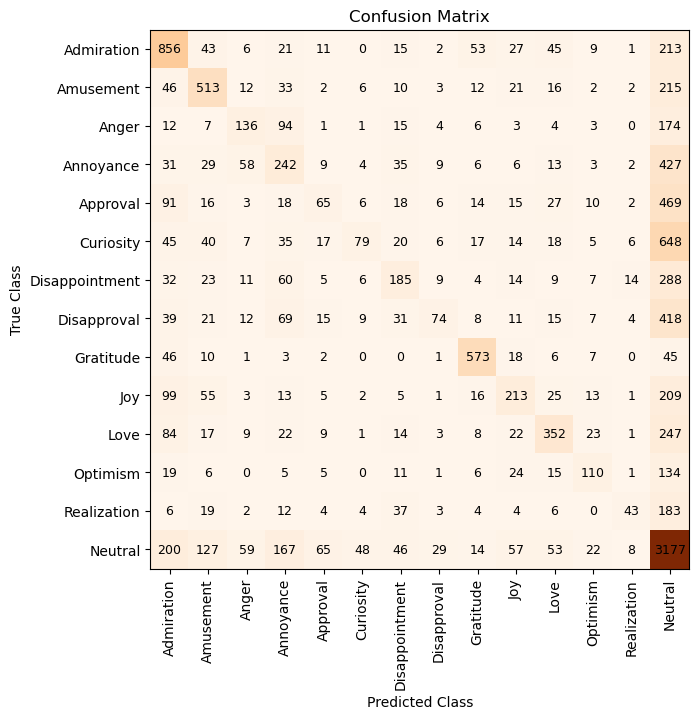

In [19]:
import matplotlib.pyplot as plt
labs = ["Admiration", "Amusement", "Anger", "Annoyance", "Approval", "Curiosity", "Disappointment", "Disapproval", "Gratitude", "Joy", "Love", "Optimism", "Realization", "Neutral"]
cm = confusion_matrix(y_test, y1_pred)

plt.figure(figsize=(7,7))
plt.imshow(cm, cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(i, j, cm[j,i],fontsize=9, ha='center', va='center')
plt.xticks(ticks=range(14), labels=labs, rotation=90)
plt.yticks(ticks=range(14), labels=labs)
plt.ylabel('True Class')
plt.show()

In [20]:
# Variation 2

y2_pred = m2.predict(X2_test)

y2_pred = np.array([np.where(x == np.max(x))[0] for x in y2_pred])
print("Variation #2 Using unigrams, stemming, and removal of additional stopwords.")
print(classification_report(y_test, y2_pred))
print("-"*100)
print("Confusion Matrix",confusion_matrix(y_test, y2_pred), sep="\n\n")

424/424 [==============================] - 2s 3ms/step
Variation #2 Using unigrams, stemming, and removal of additional stopwords.
              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1302
           1       0.52      0.54      0.53       893
           2       0.48      0.30      0.37       460
           3       0.35      0.13      0.19       874
           4       0.26      0.07      0.11       760
           5       0.34      0.05      0.08       957
           6       0.46      0.20      0.28       667
           7       0.48      0.04      0.08       733
           8       0.77      0.84      0.80       712
           9       0.41      0.28      0.33       660
          10       0.52      0.51      0.52       812
          11       0.47      0.38      0.42       337
          12       0.18      0.01      0.02       327
          13       0.42      0.82      0.55      4072

    accuracy                           0.46     13566
   

In [21]:
# Variation 3

y3_pred = m3.predict(X4_test)

y3_pred = np.array([np.where(x == np.max(x))[0] for x in y3_pred])
print("Variation #3 Using unigrams, stemming, lemmatization, and removal of additional stopwords.")
print(classification_report(y_test, y3_pred))
print("="*100)
print("Confusion Matrix",confusion_matrix(y_test, y3_pred), sep="\n\n")

424/424 [==============================] - 1s 2ms/step
Variation #3 Using unigrams, stemming, lemmatization, and removal of additional stopwords.
              precision    recall  f1-score   support

           0       0.45      0.46      0.46      1302
           1       0.55      0.45      0.49       893
           2       0.48      0.27      0.35       460
           3       0.33      0.16      0.22       874
           4       0.26      0.09      0.13       760
           5       0.32      0.08      0.12       957
           6       0.37      0.29      0.32       667
           7       0.36      0.06      0.10       733
           8       0.71      0.86      0.78       712
           9       0.40      0.22      0.28       660
          10       0.53      0.43      0.48       812
          11       0.46      0.43      0.44       337
          12       0.00      0.00      0.00       327
          13       0.42      0.78      0.55      4072

    accuracy                           0.4

In [22]:
# Variation 4

y4_pred = m4.predict(X4_test)

y4_pred = np.array([np.where(x == np.max(x))[0] for x in y4_pred])
print("Variation #4 Using unigrams, stemming, lemmatization, and removal of stopwords.")
print(classification_report(y_test, y4_pred))
print("="*100)
print("Confusion Matrix",confusion_matrix(y_test, y4_pred), sep="\n\n")

424/424 [==============================] - 1s 2ms/step
Variation #4 Using unigrams, stemming, lemmatization, and removal of stopwords.
              precision    recall  f1-score   support

           0       0.53      0.40      0.45      1302
           1       0.56      0.51      0.53       893
           2       0.47      0.29      0.36       460
           3       0.42      0.11      0.17       874
           4       0.28      0.07      0.12       760
           5       0.35      0.07      0.12       957
           6       0.42      0.27      0.33       667
           7       0.36      0.05      0.09       733
           8       0.76      0.85      0.80       712
           9       0.42      0.27      0.32       660
          10       0.53      0.49      0.51       812
          11       0.48      0.36      0.41       337
          12       0.21      0.01      0.02       327
          13       0.42      0.84      0.56      4072

    accuracy                           0.46     13566

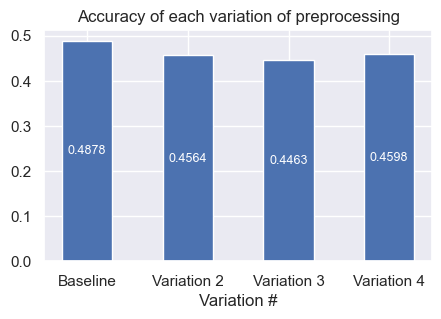

In [23]:
import seaborn
seaborn.set()
results = [y1_pred, y2_pred, y3_pred, y4_pred]

names = [('Variation '+str(i+1)) for i in range(len(results))]
names[0] = "Baseline"

from sklearn.metrics import accuracy_score

acc = [accuracy_score(y_test,y) for y in results]

import matplotlib.pyplot as plt
# plot the results

plt.figure(figsize=(5,3))
plt.bar(names, acc,0.5, label="Accuracy")
for i in range(4):
    plt.text(i, acc[i]/2, round(acc[i],4), fontdict={'size':9,'color':'white' }, ha='center', va='center')
plt.xlabel("Variation #")
plt.title("Accuracy of each variation of preprocessing")
plt.show()

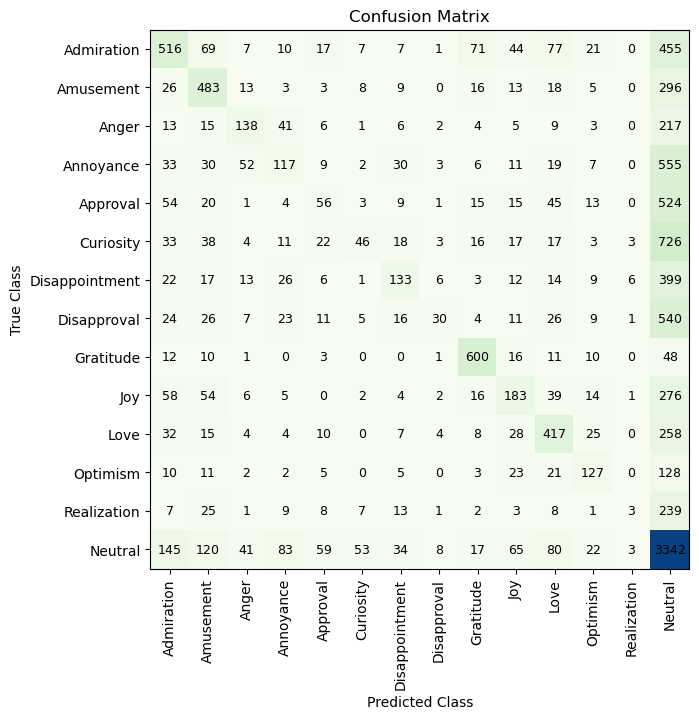

In [30]:
seaborn.reset_orig()
labs = ["Admiration", "Amusement", "Anger", "Annoyance", "Approval", "Curiosity", "Disappointment", "Disapproval", "Gratitude", "Joy", "Love", "Optimism", "Realization", "Neutral"]
cm = confusion_matrix(y_test, y2_pred)

plt.figure(figsize=(7,7))
plt.imshow(cm, cmap='GnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(i, j, cm[j,i],fontsize=9, ha='center', va='center')
plt.xticks(ticks=range(14), labels=labs, rotation=90)
plt.yticks(ticks=range(14), labels=labs)
plt.ylabel('True Class')
plt.show()

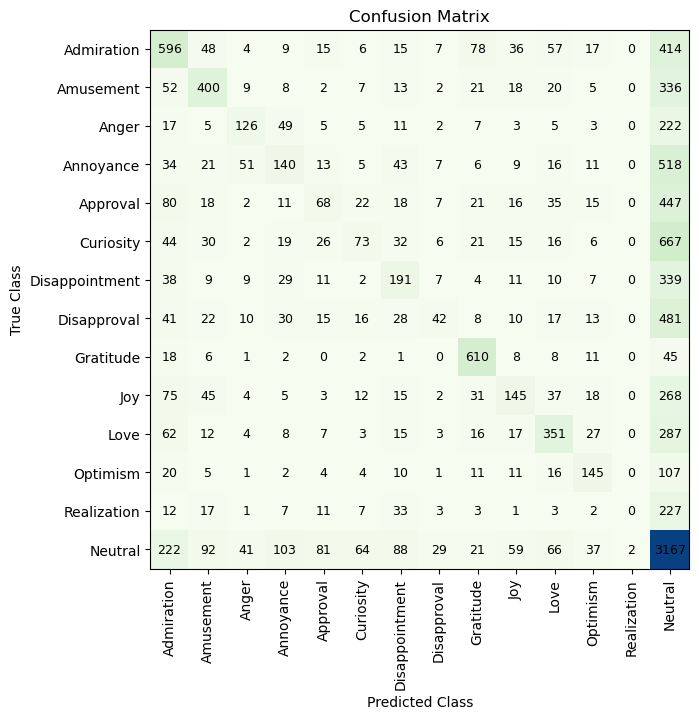

In [31]:
labs = ["Admiration", "Amusement", "Anger", "Annoyance", "Approval", "Curiosity", "Disappointment", "Disapproval", "Gratitude", "Joy", "Love", "Optimism", "Realization", "Neutral"]
cm = confusion_matrix(y_test, y3_pred)

plt.figure(figsize=(7,7))
plt.imshow(cm, cmap='GnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(i, j, cm[j,i],fontsize=9, ha='center', va='center')
plt.xticks(ticks=range(14), labels=labs, rotation=90)
plt.yticks(ticks=range(14), labels=labs)
plt.ylabel('True Class')
plt.show()

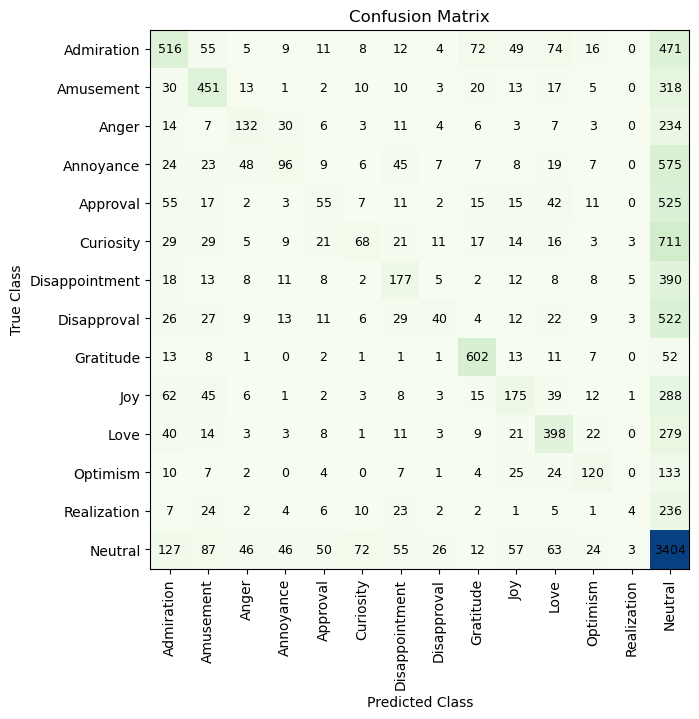

In [32]:
labs = ["Admiration", "Amusement", "Anger", "Annoyance", "Approval", "Curiosity", "Disappointment", "Disapproval", "Gratitude", "Joy", "Love", "Optimism", "Realization", "Neutral"]
cm = confusion_matrix(y_test, y4_pred)

plt.figure(figsize=(7,7))
plt.imshow(cm, cmap='GnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(i, j, cm[j,i],fontsize=9, ha='center', va='center')
plt.xticks(ticks=range(14), labels=labs, rotation=90)
plt.yticks(ticks=range(14), labels=labs)
plt.ylabel('True Class')
plt.show()